Wine Quality Data Set Information:

The dataset was downloaded from the UCI Machine Learning Repository.

The two datasets are related to red and white variants of the Portuguese "Vinho Verde" wine. 

The reference [Cortez et al., 2009].

Due to privacy and logistic issues, only physicochemical (inputs) and sensory (the output) variables are available 
(e.g. there is no data about grape types, wine brand, wine selling price, etc.).



Two datasets were combined and few values were randomly removed.

Attribute Information:

For more information, read [Cortez et al., 2009].
Input variables (based on physicochemical tests):

|serial|attribute|
|--------:|:------------|
0 -| type(wine(red or white)
1 -| fixed acidity
2 -| volatile acidity
3 -| citric acid
4 -| residual sugar
5 -| chlorides
6 -| free sulfur dioxide
7 -| total sulfur dioxide
8 -| density
9 -| pH
10 -| sulphates
11 -| alcohol
12 - |quality (score between 0 and 10) (target)

# custom def func

In [ ]:
#check shape of a DataFrame
def shape(df):

  print('Total no. of Columns :', df.shape[1]),print('Total no. of Rows    :', df.shape[0])
#********************************************************************************************************************************************************************

#Info Describe DataFrame
def info_desc(df):
  a = df.info()                              
  print('\n'*2)

  b = pd.DataFrame(df.describe())
  print(' {:^80} '.format('Describe DataFrame'),'\n')

  return  b
#********************************************************************************************************************************************************************

#check nullcounts % of a DataFrame
def get_nulls(df):

  Null_Counts = df.isnull().sum().sort_values(ascending = False)
  Null_Percentage = ((df.isnull().sum()/df.isnull().count())*100).sort_values(ascending=False)
 
  Null_Counts_Percentage = pd.concat([ Null_Counts, Null_Percentage], axis=1, keys=['Null_Counts', 'Null_Percentage'])
  return Null_Counts_Percentage
#********************************************************************************************************************************************************************

#check unique values in  DataFrame columns

def unique_in_col(df,col):
   print('* >',df[col].nunique(),'< *','n_uniques')
   print('\n')
   print(df[col].unique())
#********************************************************************************************************************************************************************

#check unique values of entire DataFramecolumns
def unique(df):
  for i in df :
   print('\n')
   print('*'*10,i,'*'*10)
   print('\n')
   print(df[i].nunique())
   print(df[i].unique()) 
#********************************************************************************************************************************************************************
def ren_col_name(df,col_rename_dict):
  df.rename(columns=col_rename_dict,inplace=True)

# Installing & Importing Libraries & Reading dataset





---
### Important Note 
---
* after pip installing plotly==4.14.3 
* pls select Runtime > Restart and run all  

only for the first time when you intialize the notebook in colab 



In [ ]:
!pip install plotly==4.14.3
# !pip install missingno       
%matplotlib inline

     |████████████████████████████████| 13.2MB 209kB/s 
  Found existing installation: plotly 4.4.1
    Uninstalling plotly-4.4.1:
      Successfully uninstalled plotly-4.4.1


In [ ]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns 
import plotly.express as px
import plotly
import plotly.graph_objs as go
from plotly.offline import iplot

In [ ]:
dataset_path = '/content/drive/MyDrive/Digbi/winequalityN.csv'
df = pd.read_csv(dataset_path)
df

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,white,7.0,0.270,0.36,20.7,0.045,45.0,170.0,1.00100,3.00,0.45,8.8,6
1,white,6.3,0.300,0.34,1.6,0.049,14.0,132.0,0.99400,3.30,0.49,9.5,6
2,white,8.1,0.280,0.40,6.9,0.050,30.0,97.0,0.99510,3.26,0.44,10.1,6
3,white,7.2,0.230,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
4,white,7.2,0.230,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6492,red,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
6493,red,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,NaN,11.2,6
6494,red,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
6495,red,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


# Intial assessment of dataset

In [ ]:
shape(df)

Total no. of Columns : 13
Total no. of Rows    : 6497


In [ ]:
info_desc(df).T

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   type                  6497 non-null   object 
 1   fixed acidity         6487 non-null   float64
 2   volatile acidity      6489 non-null   float64
 3   citric acid           6494 non-null   float64
 4   residual sugar        6495 non-null   float64
 5   chlorides             6495 non-null   float64
 6   free sulfur dioxide   6497 non-null   float64
 7   total sulfur dioxide  6497 non-null   float64
 8   density               6497 non-null   float64
 9   pH                    6488 non-null   float64
 10  sulphates             6493 non-null   float64
 11  alcohol               6497 non-null   float64
 12  quality               6497 non-null   int64  
dtypes: float64(11), int64(1), object(1)
memory usage: 660.0+ KB



                                Describe DataFrame          

,count,mean,std,min,25%,50%,75%,max
fixed acidity,6487.0,7.216579,1.296750,3.80000,6.40000,7.00000,7.70000,15.90000
volatile acidity,6489.0,0.339691,0.164649,0.08000,0.23000,0.29000,0.40000,1.58000
citric acid,6494.0,0.318722,0.145265,0.00000,0.25000,0.31000,0.39000,1.66000
residual sugar,6495.0,5.444326,4.758125,0.60000,1.80000,3.00000,8.10000,65.80000
chlorides,6495.0,0.056042,0.035036,0.00900,0.03800,0.04700,0.06500,0.61100
free sulfur dioxide,6497.0,30.525319,17.749400,1.00000,17.00000,29.00000,41.00000,289.00000
total sulfur dioxide,6497.0,115.744574,56.521855,6.00000,77.00000,118.00000,156.00000,440.00000
density,6497.0,0.994697,0.002999,0.98711,0.99234,0.99489,0.99699,1.03898
pH,6488.0,3.218395,0.160748,2.72000,3.11000,3.21000,3.32000,4.01000
sulphates,6493.0,0.531215,0.148814,0.22000,0.43000,0.51000,0.60000,2.00000


 dataset comprise of
* 12 Independent Variables Columns (features) has ```continuous``` values
* Independent Variable Column :

 ```'type'``` is ```categorical``` with two unique values red & white

* Dependent Variable Column :

  ```'quality'```  has ```discrete ordinal values``` from a scale of 3 to 9 



* ```free/total sulfur dioxide``` has the very ```high standard deviation``` as compared to others ```impact``` of these variables would be```high``` on the ```target/output``` variable i.e ```quality``` 




In [ ]:
col_rename_dict ={'type':'wine_type'}
ren_col_name(df,col_rename_dict)

In [ ]:
unique_in_col(df,'wine_type')

* > 2 < * n_uniques


['white' 'red']


In [ ]:
sorted(df['quality'].unique())

[3, 4, 5, 6, 7, 8, 9]

>New output Variable

I  created a new variable ```quality_grade```.

It would be easier for analysis of quality as categorical variable, 

7 quality labels woukd have been hard to handle and understand. 

The ```quality``` variable is thus transformed to a new variable ```quality_grade``` with the following mapping:

|quality_grade |quality_score |
|---|---|
' low ' | 3, 4 
' medium '|  5, 6 
' high '| 7, 8 
' finest '| 9

In [ ]:
df["quality_grade"] = df['quality'].apply(lambda x:
                                          'low' if x <= 4 else
                                          'medium' if x <= 6 else
                                          'high' if x <= 8 else
                                          'finest')

# duplicates & null values check

* check columns for duplicate rows  

In [ ]:
def dup_rows_index(df):
  dup = df[df.duplicated()]
  print('Duplicated index loc:',dup[dup == True ].index.tolist())
  print('\n')
  print("Total duplicates in dataframe >>> '{}'".format((np.sum(np.array(df.duplicated())))))
  return dup

In [ ]:
dup_rows_index(df)

While duplicated rows may cause biases in analysis and inference,

I think the duplicated rows here look more like several wine tasters rating the same wine similarly.

Hence, it will be relevant to keep all the observations as this can add more information.

* check columns for null value_counts 

In [ ]:
nulls = get_nulls(df)
nulls

,Null_Counts,Null_Percentage
fixed acidity,10,0.153917
pH,9,0.138525
volatile acidity,8,0.123134
sulphates,4,0.061567
citric acid,3,0.046175
chlorides,2,0.030783
residual sugar,2,0.030783
quality_grade,0,0.000000
quality,0,0.000000
alcohol,0,0.000000


**total** % of missing/null values in *dataset*

In [ ]:
nulls['Null_Percentage'].sum() #total % of missing/null values in *dataset*

0.5848853316915499

In [ ]:
shape(df)
print('\n',"*"*25)
print('wine_quality_grade counts')
print(df.quality_grade.value_counts())

Total no. of Columns : 14
Total no. of Rows    : 6497

 *************************
wine_quality_grade counts
medium    4974
high      1272
low        246
finest       5
Name: quality_grade, dtype: int64


In [ ]:
df.dropna(inplace=True) # dropping null values from dataset

In [ ]:
shape(df) # checking shape after dropping null values from dataset
print('\n')
print(df.quality_grade.value_counts())

Total no. of Columns : 14
Total no. of Rows    : 6463


medium    4948
high      1266
low        244
finest       5
Name: quality_grade, dtype: int64


In [ ]:
6497-6463 # difference of rows from orginal dataset 

34

In [ ]:
34/6497*100 # percetage of total rows dropped with null values

0.5233184546713868

In [ ]:
print(df.quality_grade.value_counts())

medium    4974
high      1272
low        246
finest       5
Name: quality_grade, dtype: int64


* 34 records with null values in them has been dropped/removed for further analysis  
* As the total percent of records is merely 0.52 % we didnt imputed these null values with median or mode 

From quality_grade number of records removed 
*   low    : 02 records
*   medium : 26 records 
*   high   : 06 records
*   finest : 00 records



# Distribution of categorical variables


Distribution/value_counts
* wine_type
* quality_grade
* quality

In [ ]:
def cat_hist(df):
  cat_df   = df.select_dtypes(exclude = np.number)
  cat_cols = cat_df.columns
  for i in cat_cols :
    i = px.histogram(df,x=i,color = i,title ='Distribution : <b>* {} *</b>'.format(i))#.update_yaxes(categoryorder="total ascending")
    i.show()

In [ ]:
cat_hist(df)
print('\n')
print(df['wine_type'].value_counts())
print('\n')
print(df['quality_grade'].value_counts())



white    4898
red      1599
Name: wine_type, dtype: int64


medium    4974
high      1272
low        246
finest       5
Name: quality_grade, dtype: int64



>Among  wine_type
* white_wine has (4870) count
* red_wine has (1593) count

>Among  wine_quality_grade
* medium_quality_grade (4948)   has the highest count 
* high_quality_grade   (1266)
* low_quality_grade     (244)
* finest_quality_grade    (5)   has the least count               

In [ ]:
quality_hist = px.histogram(df,x='quality',color='quality',title='Distribution : <b>* Wine_Quality *</b>',category_orders={'quality':[3,4,5,6,7,8,9]})
quality_hist.show()
print('\n')
df['quality'].value_counts().sort_values()

9       5
3      30
8     193
4     216
7    1079
5    2138
6    2836
Name: quality, dtype: int64

* We can clearly see ```most``` of the ```data points``` are between ```quality scale``` of ```5-7```
* with ```very few``` on ```both``` the ```tails``` 
* We see a ```normal distribution```  here 

###check the proportion of wine_type w.r.t. to its quality & quality_grade distribution




In [ ]:
quality_hist = px.histogram(df,x='quality_grade',
                            color='wine_type',
                            title='Distribution : <b> Wine_Quality_Grade  w.r.t. Wine_Type</b>',
                            barmode='stack')# w.r.t >> with respect to 
quality_hist.show()

* In quality_grade distribution we can see the proportion of ```red``` and ```white``` wine seperately
* ``finest`` quality_grade consist of only one type of wine i.e ```White_Wine```

In [ ]:
quality_hist = px.histogram(df,x='quality',
                            color='wine_type',
                            title='Distribution : <b>Wine_Quality  w.r.t. Wine_Type</b>',
                            barmode='stack') # w.r.t with respect to 
quality_hist.show()

* Likewise in wine_quality distribution we can see how red and white wine represents the value_counts

# Distribution of numerical variables 


In [ ]:
def num_hist(df):
  num_df   = df.select_dtypes(include = np.number)
  num_cols = num_df.columns[:-1]
  for i in num_cols :
    i = px.histogram(df,x=i,marginal="box",title ='<b>* {} *</b>'.format(i))#.update_yaxes(categoryorder="total ascending")
    i.show()

### Skewness & Kurtosis
> * Check skewness & kurtosis of numerical columns

 



In [ ]:
skewness = df.skew()
kurtosis = df.kurtosis()
skewness_df = pd.DataFrame({'skewness':skewness}).T
kurtosis_df = pd.DataFrame({'kurtosis':kurtosis}).T
df_skew_kurt = skewness_df.append([kurtosis_df]).T
df_skew_kurt = df_skew_kurt.sort_values(by='skewness',ascending=False)
df_skew_kurt

,skewness,kurtosis
chlorides,5.399849,50.894874
sulphates,1.798467,8.659892
fixed acidity,1.722805,5.057727
volatile acidity,1.495512,2.827081
residual sugar,1.435000,4.358134
free sulfur dioxide,1.220066,7.906238
alcohol,0.565718,-0.531687
density,0.503602,6.606067
citric acid,0.473032,2.401582
pH,0.386966,0.370068


Merely by having a glance on values of skewness & kurtosis  we can imagine the spread of data
 
>* Skewness

* If the skewness is between -0.5 and 0.5, the data would be fairly symmetrical.

* If the skewness is between -1 and – 0.5 or between 0.5 and 1, the data are moderately skewed.

* If the skewness is less than -1 or greater than 1, the data are highly skewed. 
> skewness > 1 positively(right) skewed 
>> skewness < -1 negatively(left) skewed

> * Kurtosis (peakedness)

* The value is often compared to the kurtosis of the normal distribution, which is equal to 3.
* If the kurtosis is greater than 3, then the dataset has heavier tails than a normal distribution (more in the tails).
* If the kurtosis is less than 3, then the dataset has lighter tails than a normal distribution (less in the tails).
>  kurtosis > 3  : heavy tailed
>> kurtosis < 3 : light tailed

## Histogram & Boxplot 



* Lets visualize the spread of numerical variables by histogram and boxplot


In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
fixed acidity,6463.0,7.217755,1.297913,3.80000,6.40000,7.00000,7.700,15.90000
volatile acidity,6463.0,0.339589,0.164639,0.08000,0.23000,0.29000,0.400,1.58000
citric acid,6463.0,0.318758,0.145252,0.00000,0.25000,0.31000,0.390,1.66000
residual sugar,6463.0,5.443958,4.756852,0.60000,1.80000,3.00000,8.100,65.80000
chlorides,6463.0,0.056056,0.035076,0.00900,0.03800,0.04700,0.065,0.61100
free sulfur dioxide,6463.0,30.516865,17.758815,1.00000,17.00000,29.00000,41.000,289.00000
total sulfur dioxide,6463.0,115.694492,56.526736,6.00000,77.00000,118.00000,156.000,440.00000
density,6463.0,0.994698,0.003001,0.98711,0.99233,0.99489,0.997,1.03898
pH,6463.0,3.218332,0.160650,2.72000,3.11000,3.21000,3.320,4.01000
sulphates,6463.0,0.531150,0.148913,0.22000,0.43000,0.51000,0.600,2.00000


In [ ]:
df_skew_kurt

,skewness,kurtosis
chlorides,5.403432,50.898199
sulphates,1.802941,8.679013
fixed acidity,1.721648,5.048793
volatile acidity,1.500040,2.845661
residual sugar,1.437126,4.384599
free sulfur dioxide,1.223427,7.932117
alcohol,0.565435,-0.532672
density,0.504204,6.614623
citric acid,0.474907,2.416930
pH,0.391094,0.378444


In [ ]:
num_hist(df)

fixed acidity



we see a moderately right skewed curve
with most values falling between Q1-Q3 ie (6.4 - 7.7)
skewness  = 1.721648  
kurtosis     = 5.048793


---


volatile acidity 

we see a moderately right skewed curve
with most values falling between Q1-Q3 ie (0.23-0.40)
skewness  = 1.500040
kurtosis     = 2.845661



---


Citric acid 

Standard deviation for citric acid is 0.145
Range Q1 - Q 3 (0.25-0.39)
Seeing the plot it's hard to say the distribution as we can see an unusual peak at 0.49


---


Residual sugars

Skewness =  1.43
Kurtosis    = 4.38
We can see positive right skewness with heavy tailed distribution

Range Q1 - Q 3 (1.8 - 8.1)
With standard deviation 4.75

---

Chlorides 

Skewness =  5.40
Kurtosis    = 50.89
positive skewness with heavy-tailed distribution 

Range Q1 - Q 3 (0.038 - 0.065)
With standard deviation 0.03

---

Free  Sulphur dioxide


Skewness =  1.22
Kurtosis    =  7.93
Std             =  17.75

Highly right skewed with heavy tailed distribution with an extreme outlier

Range Q1 - Q 3 (17-41)
As  standard deviation is high Free  Sulphur dioxide may be having impact on wine quality

---

Total Sulphur dioxide


Skewness =  -0.000425 
Kurtosis    =  -0.369688
Std             =  56.526736

Almost normal with light tailed distribution seen with few outliers
As  standard deviation is high Total Sulphur dioxide may be having impact on wine quality

---


Density 

Heavy tailed with almost normal distribution  with few outliers
Range Q1 - Q 3 (0.092 - 0.997)

---


pH

normal distribution seen

Range Q1 - Q 3 (3.11 - 3.32)

---

Sulphates

Skewness =  1.802941
Kurtosis    =  8.679013

positively right skewed with heavy-tailed distribution seen

Range Q1 - Q 3 (0.43 - 0.6)

---

Alcohol


Skewness =    0.565435	
Kurtosis    =  -0.532672

Moderately right skewed with few outliers 

Range Q1 - Q 3  (9.50000 - 11.300)






### Distribution of numerical variables w.r.t. wine_type


In [ ]:
def num_hist1_wine_type(df):
  num_df   = df.select_dtypes(include = np.number)
  num_cols = num_df.columns[:-1]
  for i in num_cols :
    i = px.histogram(df,x=i,color="wine_type",barmode='group',marginal="box",title ='<b>* {} *</b>'.format(i))#.update_yaxes(categoryorder="total ascending")
    i.show()

In [ ]:
num_hist1_wine_type(df)

inferences of Range (Q1 - Q3) for red and white wines 

---
> Fixed Acidity
* Fixed Acidity : Red (7.1 - 9.2) > White (6.3 - 7.3)

* Most red wines has fixed acidity levels between range (7.1 - 9.2)
which is higher when compared to white wines range (6.3 - 7.3)

---
> Volatility Acidity 

* Volatility acidity: Red (0.39 - 0.64) > White (0.21 - 0.32)
 

---

> Citric Acid

* Citric Acid : Red (0.09 - 0.4225) &  White (0.27 - 0.39)

Citric content for red wines & white wines shows relatively same distribution on scale  

---

> Residual sugar

* Residual sugar : Red  (1.9 - 2.6) <  White (1.7 - 9.9)

* range Q1-Q3 Residual sugar for red wines is low than white wines 


---

>chlorides

* Chlorides : Red  (0.07 - 0.09) >  White (0.036 - 0.05)
* range Q1-Q3 Chlorides for red wines is greater than white wines 

---

> Free sulphur dioxide ***prominent

* Free sulphur dioxide  : Red  (07 - 21) <  White (23 - 46)

* range Q1-Q3 Free sulphur dioxide for white wines is greater than red wines 

---


> Total sulphur dioxide 

* Total sulphur dioxide  : Red  (22 - 62) <  White (108- 167)

* range Q1-Q3 for Total sulphur dioxide for white wines is greater than red wines 


---



> Sulphates

* Sulphates    : Red  (0.55 - 0.73) >  White (0.41- 0.55)

* range Q1-Q3 for Total Sulphates for Red wines is greater than White variant

---

> > Density and pH & alcohols  have relatively low comparison





### Distribution of numerical variables w.r.t. wine_quality_grade


In [ ]:
def num_hist_wine_quality_grade(df):
  num_df   = df.select_dtypes(include = np.number)
  num_cols = num_df.columns[:-1]
  for i in num_cols :
    i = px.histogram(df,x=i,color="quality_grade",barmode='group',marginal="box",title ='<b>* {} *</b>'.format(i))#.update_yaxes(categoryorder="total ascending")
    i.show()

In [ ]:
num_hist_wine_quality_grade(df)

* high & finest quality_grade   
* has higher alcohol content & and low density & chloride 
* when compared with low & medium quality_grade 

# Correlation 

* correlation of independent variable with quality

In [ ]:
df_corr_quality =df.corr()['quality']
df_corr_quality.sort_values()

density                -0.304447
volatile acidity       -0.266677
chlorides              -0.200553
fixed acidity          -0.076174
total sulfur dioxide   -0.041598
residual sugar         -0.034654
pH                      0.018403
sulphates               0.039054
free sulfur dioxide     0.054924
citric acid             0.084926
alcohol                 0.444637
quality                 1.000000
Name: quality, dtype: float64

Negative correlation of attributes with wine quality in order highest to lowest

|attributes|correlation|
|---|---|
* density           | -0.304447
* volatile acidity  |  -0.266677
* chlorides          |    -0.200553
* fixed acidity      |    -0.076174
* total sulfur dioxide|   -0.041598
* residual sugar       |  -0.034654

Positive correlation with wine quality in order highest to lowest

|attributes|correlation|
|---|---|
alcohol               |  0.444637
citric acid           |  0.084926
free sulfur dioxide   |  0.054924
sulphates             |  0.039054
pH                    |  0.018403

* correlation matrix to check correlation among the independent variables

In [ ]:
df_corr =df.corr()

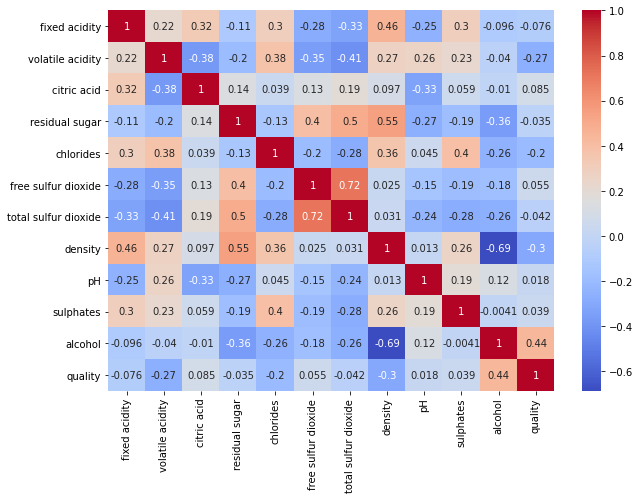

In [ ]:
plt.figure(figsize=(10,7))
sns.heatmap(df_corr,annot=True,cmap='coolwarm')
plt.show()

* strong negative correlation between alcohol and density

* strong Postive correlation between Free and Total Sulphur dioxide 
 means we can take either of them in account to correlate with quality

* Postive correlation between residual sugar,fixed acidity w.r.t density

* Postive correlation between chlorides and acidity content, sulphates & density

* Positive correlation between alcohol and quality means higher alcohol content results with good quality wine 


# Insights - Comparision with median w.r.t. quality & quality_grade 



In [ ]:
describe_df = pd.DataFrame(df.describe()).T
describe_df[[ 'mean', '50%','std', 'min', 'max']]

,mean,50%,std,min,max
fixed acidity,7.217755,7.00000,1.297913,3.80000,15.90000
volatile acidity,0.339589,0.29000,0.164639,0.08000,1.58000
citric acid,0.318758,0.31000,0.145252,0.00000,1.66000
residual sugar,5.443958,3.00000,4.756852,0.60000,65.80000
chlorides,0.056056,0.04700,0.035076,0.00900,0.61100
free sulfur dioxide,30.516865,29.00000,17.758815,1.00000,289.00000
total sulfur dioxide,115.694492,118.00000,56.526736,6.00000,440.00000
density,0.994698,0.99489,0.003001,0.98711,1.03898
pH,3.218332,3.21000,0.160650,2.72000,4.01000
sulphates,0.531150,0.51000,0.148913,0.22000,2.00000


In [ ]:
describe_df['std'].sort_values(ascending=False)

total sulfur dioxide    56.526736
free sulfur dioxide     17.758815
residual sugar           4.756852
fixed acidity            1.297913
alcohol                  1.193128
quality                  0.873286
volatile acidity         0.164639
pH                       0.160650
sulphates                0.148913
citric acid              0.145252
chlorides                0.035076
density                  0.003001
Name: std, dtype: float64

In [ ]:
quality_median = df.groupby('quality').median()
quality_median.T

quality,3,4,5,6,7,8,9
fixed acidity,7.4500,7.000000,7.1000,6.9000,6.9000,6.80000,7.1000
volatile acidity,0.4150,0.380000,0.3300,0.2700,0.2700,0.27500,0.2700
citric acid,0.3300,0.260000,0.3000,0.3100,0.3200,0.32000,0.3600
residual sugar,3.1500,2.200000,3.0000,3.2000,2.8000,4.15000,2.2000
chlorides,0.0550,0.050500,0.0530,0.0460,0.0390,0.03700,0.0310
free sulfur dioxide,17.0000,15.000000,27.0000,29.0000,30.0000,34.00000,28.0000
total sulfur dioxide,102.5000,102.000000,126.5000,117.0000,114.0000,118.50000,119.0000
density,0.9959,0.994985,0.9961,0.9947,0.9924,0.99189,0.9903
pH,3.2450,3.220000,3.1900,3.2100,3.2200,3.23000,3.2800
sulphates,0.5050,0.485000,0.5000,0.5100,0.5200,0.48000,0.4600


In [ ]:
quality_grade_median= df.groupby('quality_grade').median().iloc[:,:-1].T
quality_grade_median[['low', 'medium', 'high', 'finest']]

quality_grade,low,medium,high,finest
fixed acidity,7.100,7.0000,6.900000,7.1000
volatile acidity,0.380,0.3000,0.270000,0.2700
citric acid,0.270,0.3100,0.320000,0.3600
residual sugar,2.200,3.1000,2.900000,2.2000
chlorides,0.051,0.0490,0.039000,0.0310
free sulfur dioxide,15.000,28.0000,31.000000,28.0000
total sulfur dioxide,102.000,120.0000,114.000000,119.0000
density,0.995,0.9954,0.992295,0.9903
pH,3.225,3.2000,3.220000,3.2800
sulphates,0.490,0.5100,0.510000,0.4600


># Insights  :

###  Comparision with ```median``` is a better measure as it is ```robust(resistant)``` to ```outliers```.

>```Fixed Acidity``` : Similar for all wine quality_grade

>```Volatile acidity``` : ```Lower``` the volatile acidity ```better``` the wine_ ```quality```

>```Citric acid``` : Citric Acid on comparative scale a bit on ```higher``` side for ```better``` quality 

>```Residual sugar``` : No Distinct Comparison seen

>```Chlorides``` : ```Lower``` the chlorides ```better``` the wine_```quality```

>```Free/Total sulphur dioxide``` : ```Higher``` the sulphur dioxide content ```better``` the wine_```quality```

>```pH/Density``` : Almost similar values for wine_quality

>```Alcohol``` : ```Higher``` alcohol content ```improves``` wine_```quality```

* Volatile acidity
* Chlorides
* Free/Total sulphur dioxide &
* Alcohol  
has more impact on quality of wine

## To arrive at the final outcome whether improving the attributes which account for quality of wine will improve the sales or have a positive impact on consumers ?

## We would require additional data like
* Geolocation (consumer) - location/area representing consumer
* Sales Figures (weekly / monthly / quaterly /yearly)
* Cost (wine) 
* Packaging variants(wine)



### later on, we can correlate the wine quality to these additional data attributes to improve sales and consumer satisfaction
